In [124]:
 !pip install unidecode

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode


In [126]:
data = pd.read_csv('/content/x.csv')

In [127]:
data.head(5)

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22


In [128]:
data['Client'].value_counts()

,count
Client,
CLIENT AU COMPTANT,9955
CLIENT CARTE PRÉPAYÉE,735


In [129]:
df=data.copy()

In [130]:
df.columns = [unidecode(col).lower() for col in df.columns]

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_reglement      15222 non-null  int64  
 1   id_operation      15222 non-null  int64  
 2   date_reglement    15222 non-null  object 
 3   heure_reglement   15222 non-null  object 
 4   paiement          15222 non-null  object 
 5   reference         99 non-null     float64
 6   montant_rgl       15222 non-null  float64
 7   montant_verse     15222 non-null  float64
 8   montant_rst       15222 non-null  float64
 9   id_client         10690 non-null  object 
 10  client            10690 non-null  object 
 11  id_cartepp        15222 non-null  object 
 12  beneficiaire_cpp  14668 non-null  object 
 13  solde_cpp         15222 non-null  float64
 14  id_restaurant     15222 non-null  object 
 15  restaurant        15222 non-null  object 
 16  id_user           15221 non-null  object

In [132]:
df.describe()

,id_reglement,id_operation,reference,montant_rgl,montant_verse,montant_rst,solde_cpp,pointage
count,15222.000000,1.522200e+04,9.900000e+01,15222.000000,15222.000000,1.522200e+04,15222.000000,0.0
mean,304552.634673,6.415931e+08,5.541115e+15,33.954553,33.954553,-1.406516e-08,631.318233,NaN
std,38098.097638,1.482726e+08,3.240446e+15,59.042239,59.042240,1.320466e-06,671.655797,NaN
min,250355.000000,2.019016e+08,5.850000e+02,1.500000,1.500000,-9.918212e-05,1.500000,NaN
25%,271202.750000,5.005158e+08,2.759346e+15,10.000000,10.000000,0.000000e+00,100.000000,NaN
50%,299481.500000,7.008713e+08,4.293358e+15,24.000000,24.000000,0.000000e+00,330.000000,NaN
75%,334226.750000,7.008972e+08,9.432400e+15,45.000000,45.000000,0.000000e+00,960.875000,NaN
max,388034.000000,9.061058e+08,9.942445e+15,2799.527996,2799.528076,5.340576e-05,6000.000000,NaN


In [133]:
df.isnull().sum()

,0
id_reglement,0
id_operation,0
date_reglement,0
heure_reglement,0
paiement,0
reference,15123
montant_rgl,0
montant_verse,0
montant_rst,0
id_client,4532


In [134]:
df['paiement'].value_counts()

,count
paiement,
Carte prépayée,15222


In [135]:
df['id_client'].value_counts()

,count
id_client,
CLT10001,9955
CLT10002,735


In [136]:
df['beneficiaire_cpp'].value_counts()

,count
beneficiaire_cpp,
RACHIDI Salah,278
YAO DJETH,276
DOUDOUH,272
SELMANI,255
NAIT YAZZA,244
...,...
ABOUBOU,1
EL HAJHOUJ,1
BOUHSSINI,1


In [137]:
df['solde_cpp'].value_counts()

,count
solde_cpp,
1903.10,108
100.00,102
1904.10,79
1903.30,63
1902.10,61
...,...
825.41,1
2506.50,1
822.41,1


In [138]:
df['restaurant'].value_counts()

,count
restaurant,
Café - Boulangerie - Pâtisserie - Rabat,8152
Snack Pizzeria - Rabat,4639
L'Casis Cafétéria HCZ,1111
Lavomatic - Rabat,641
Epicerie - Rabat,528
Pharmacie & Parapharmacie - Rabat,94
Restaurant Gastronomique - Rabat,57


In [139]:
df['prenom user'].value_counts()

,count
prenom user,
Souhail,4311
Hamza,4158
Soundoss,3581
Ayoub,797
Fadwa,641
Abdelkarim,515
Morad,361
Moncef,324
Ayman,235


In [140]:
df['client'].value_counts()

,count
client,
CLIENT AU COMPTANT,9955
CLIENT CARTE PRÉPAYÉE,735


In [141]:
df=df.drop(columns='reference')

***gérer les champs de date ***

In [142]:
df['date_reglement'] = pd.to_datetime(df['date_reglement'], errors='coerce')

In [143]:
df['mois_reglment'] = df['date_reglement'].dt.month

In [144]:
df['semaine_reglement'] =df['date_reglement'].dt.isocalendar().week

In [145]:
df['year_reglment'] = df['date_reglement'].dt.year

In [146]:
df.head(4)

,id_reglement,id_operation,date_reglement,heure_reglement,paiement,montant_rgl,montant_verse,montant_rst,id_client,client,...,restaurant,id_user,prenom user,role,statut,pointage,date_sys,mois_reglment,semaine_reglement,year_reglment
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,13.5,13.5,0.0,CLT10001,CLIENT AU COMPTANT,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29,2,9,2024
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,8.0,8.0,0.0,CLT10001,CLIENT AU COMPTANT,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29,2,9,2024
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,20.0,20.0,0.0,CLT10001,CLIENT AU COMPTANT,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29,2,9,2024
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,87.0,87.0,0.0,CLT10001,CLIENT AU COMPTANT,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22,2,8,2024


**2-Analyse des Tendances des Transactions : Évolution des Montants par Jour, Mois et Année**

In [147]:
#regroupment par jour
df['montant_rgl'] = pd.to_numeric(df['montant_rgl'], errors='coerce')
daily_trends = df.groupby('date_reglement')['montant_rgl'].sum().reset_index()

#regroupment par semaines

weekly_trends = df.groupby('semaine_reglement')['montant_rgl'].sum().reset_index()



#regroupment par mois
monthly_trends = df.groupby('mois_reglment')['montant_rgl'].sum().reset_index()
print(daily_trends)

    date_reglement  montant_rgl
0       2024-01-01  2185.500000
1       2024-01-02  3928.500000
2       2024-01-03  3614.500000
3       2024-01-04  3856.000000
4       2024-01-05  3912.500000
..             ...          ...
238     2024-08-31  1402.550002
239     2024-09-01  2100.400002
240     2024-09-02  2816.700000
241     2024-09-03  2135.890000
242     2024-09-04   211.000000

[243 rows x 2 columns]


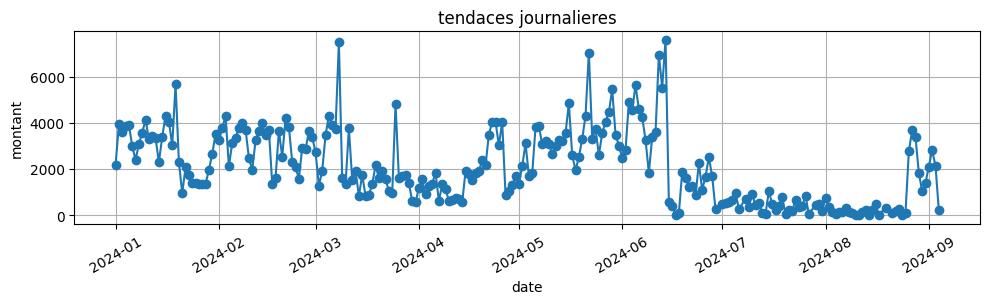

In [148]:
#graphiques linéaires pour les tendances journalières
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
plt.plot(daily_trends['date_reglement'],daily_trends['montant_rgl'],marker = 'o')
plt.title('tendaces journalieres')
plt.xlabel('date')
plt.ylabel('montant')
plt.xticks(rotation=30)
plt.grid()
plt.tight_layout()

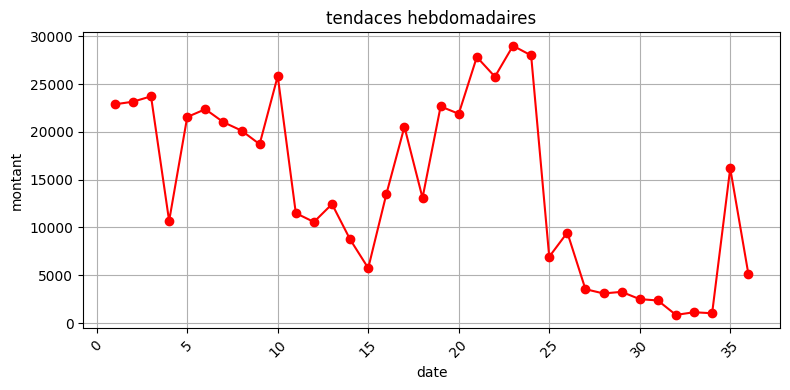

In [149]:
#graphiques linéaires pour les tendances hebdomadaires
plt.figure(figsize=(8,4))


plt.plot(weekly_trends['semaine_reglement'],weekly_trends['montant_rgl'],marker = 'o',c='r')
plt.title('tendaces hebdomadaires')
plt.xlabel('date')
plt.ylabel('montant')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


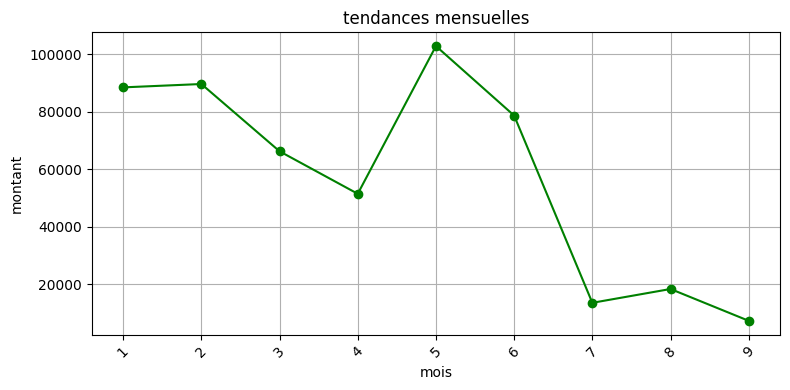

In [150]:
#graphiques linéaires pour les tendances mensuelles
plt.figure(figsize=(8,4))

plt.plot(monthly_trends['mois_reglment'],monthly_trends['montant_rgl'] , marker='o',c='green')
plt.title('tendances mensuelles')
plt.xlabel('mois')
plt.ylabel('montant')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# ***Analyse des tendances d'utilisation des cartes prépayées***



In [151]:
#verifier les valuers null dans solde_cpp
df['solde_cpp'].isna().sum()

0

In [152]:
#regroupment par date
df['solde_cpp'] = pd.to_numeric(df['solde_cpp'], errors='coerce')
daily_soldes = df.groupby('date_reglement')['solde_cpp'].mean().reset_index()
monthly_soldes = df.groupby('mois_reglment')['solde_cpp'].mean().reset_index()
weekly_soldes = df.groupby('semaine_reglement')['solde_cpp'].mean().reset_index()

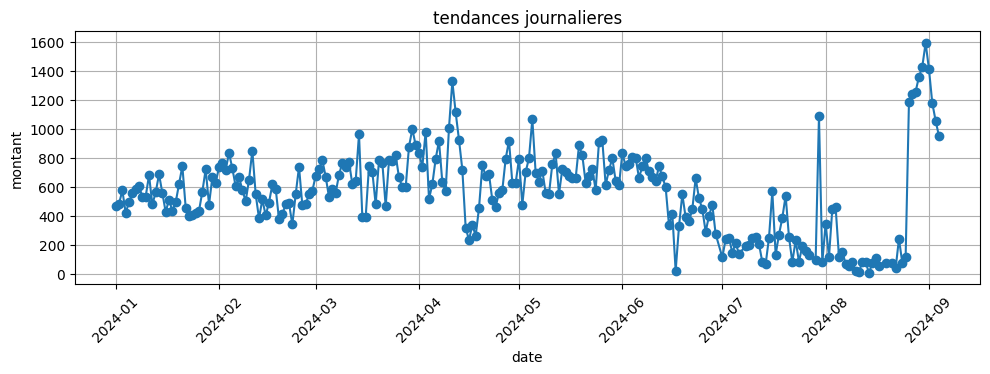

In [153]:
#tendances journalieres
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.plot(daily_soldes['date_reglement'],daily_soldes['solde_cpp'],marker = 'o')
plt.title('tendances journalieres')
plt.xlabel('date')
plt.ylabel('montant')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

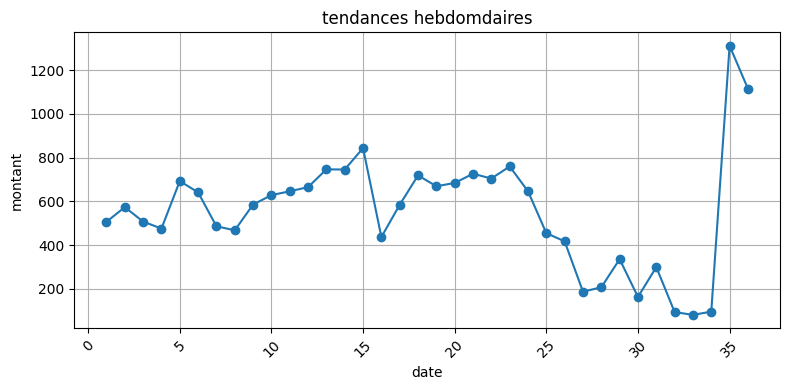

In [154]:
#tendances hebdomdaires
plt.figure(figsize=(8,4))

plt.plot(weekly_soldes['semaine_reglement'],weekly_soldes['solde_cpp'],marker = 'o')
plt.title('tendances hebdomdaires')
plt.xlabel('date')
plt.ylabel('montant')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


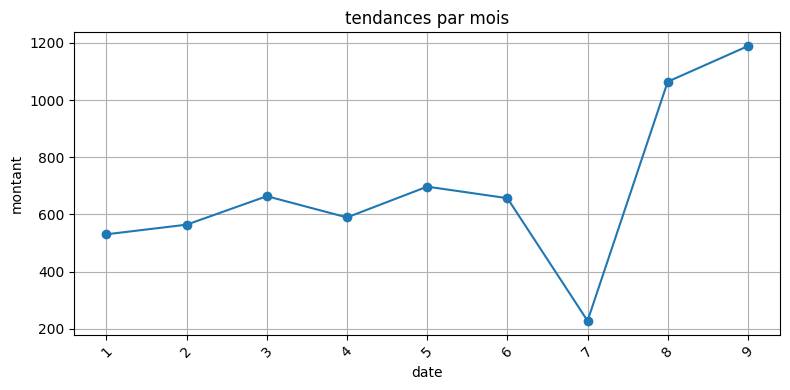

In [155]:
#tendances par mois
plt.figure(figsize=(8,4))

plt.plot(monthly_soldes['mois_reglment'],monthly_soldes['solde_cpp'],marker = 'o')
plt.title('tendances par mois')
plt.xlabel('date')
plt.ylabel('montant')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


# ***Analyse du comportement des clients***

In [156]:
#les plus gros depensiers
top_clients = df.groupby('beneficiaire_cpp')['montant_rgl'].sum().sort_values(ascending=False).head(10).reset_index()

In [157]:
top_beneficiaires = top_clients['beneficiaire_cpp']

# Filtrer le DataFrame initial pour ne conserver que les lignes correspondant a ces beneficiaires
df_filtered = df[df['beneficiaire_cpp'].isin(top_beneficiaires)]

In [158]:
# la depense moyenne par transaction pour top10 client
avg_spent_per_client = df.groupby('beneficiaire_cpp')['montant_rgl'].mean().sort_values(ascending=False).head(10).reset_index()


In [159]:
#Analyser les tendances du solde des cartes prepayees pour les clients les plus depensiers.
top_clients_soldes = df_filtered.groupby('beneficiaire_cpp')['solde_cpp'].mean().sort_values(ascending=False).head(10).reset_index()


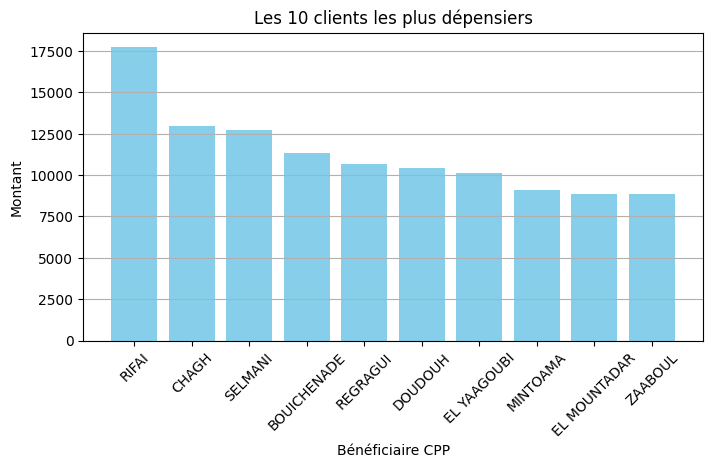

In [160]:
#diagramme a barres pour Les 10 clients les plus depensiers
plt.figure(figsize=(8,4))
plt.bar(top_clients['beneficiaire_cpp'], top_clients['montant_rgl'], color='skyblue')
plt.title('Les 10 clients les plus dépensiers')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Montant')
plt.xticks(rotation=45)
plt.grid(axis='y')

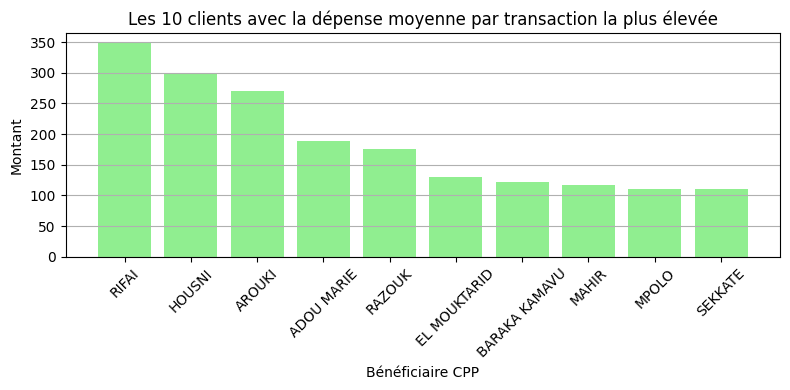

In [161]:
#graphe pour Les 10 clients avec la dépense moyenne par transaction la plus élevée
plt.figure(figsize=(8,4))
plt.bar(avg_spent_per_client['beneficiaire_cpp'], avg_spent_per_client['montant_rgl'], color='lightgreen')
plt.title('Les 10 clients avec la dépense moyenne par transaction la plus élevée')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Montant')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


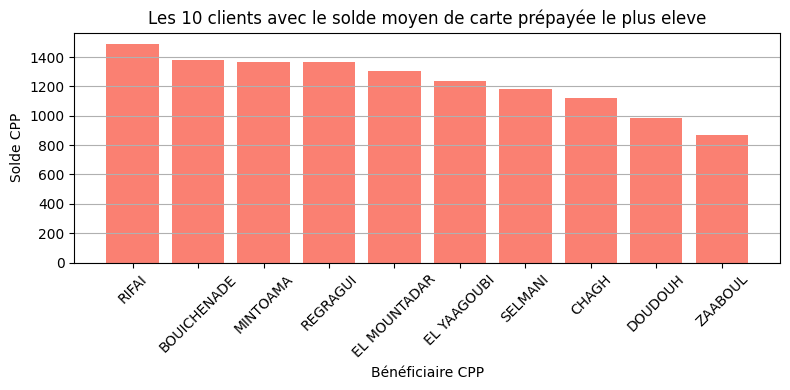

In [162]:
#Les 10 clients avec le solde moyen de carte prépayée le plus eleve
plt.figure(figsize=(8, 4))
plt.bar(top_clients_soldes['beneficiaire_cpp'], top_clients_soldes['solde_cpp'], color='salmon')
plt.title('Les 10 clients avec le solde moyen de carte prépayée le plus eleve')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Solde CPP')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.tight_layout()
plt.show()

# ***Analyse des montants restants :***

In [163]:
#verfier les valeurs null dans montant_rst
df['montant_rst'].isna().sum()

0

In [164]:
df_impaid = df[df['montant_rst']>0]

Clients avec les soldes impayes les plus eleves:
(31,)


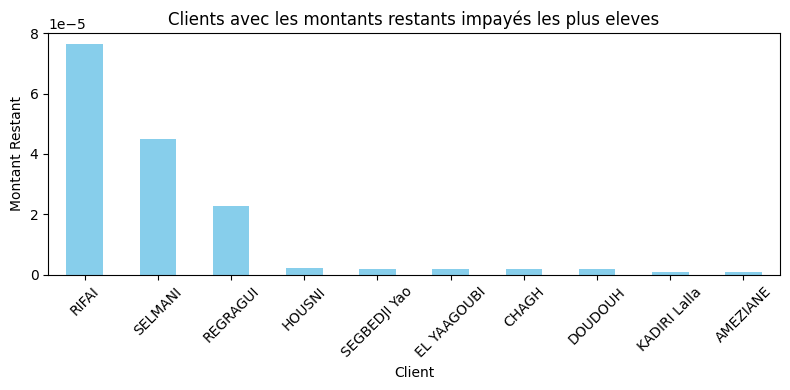

In [167]:
df_impayes = df[df['montant_rst'] > 0]

clients_impayes = df_impayes.groupby('beneficiaire_cpp')['montant_rst'].sum().sort_values(ascending=False)


print("Clients avec les soldes impayes les plus eleves:")
print(clients_impayes.shape)





plt.figure(figsize=(8, 4))
clients_impayes.head(10).plot(kind='bar', color='skyblue')
plt.title('Clients avec les montants restants impayés les plus eleves')
plt.xlabel('Client')
plt.ylabel('Montant Restant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Analyse des heures de pointe et des lieux les plus performants***

In [168]:
df['heure_reglement'] = pd.to_datetime(df['heure_reglement'], format='%H:%M:%S')

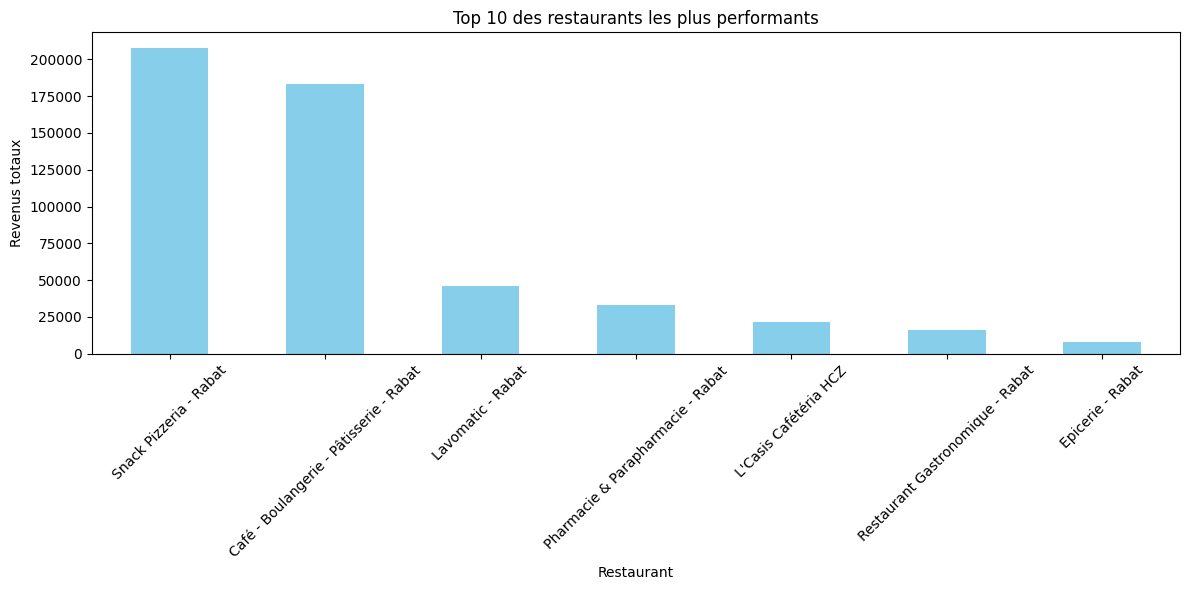

In [169]:
restaurant_revenue = df.groupby('restaurant')['montant_rgl'].sum().sort_values(ascending=False)

# Affichage des 10 restaurants les plus performants Aux niveaux de montant


plt.figure(figsize=(12,6 ))
restaurant_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 des restaurants les plus performants')
plt.xlabel('Restaurant')
plt.ylabel('Revenus totaux')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



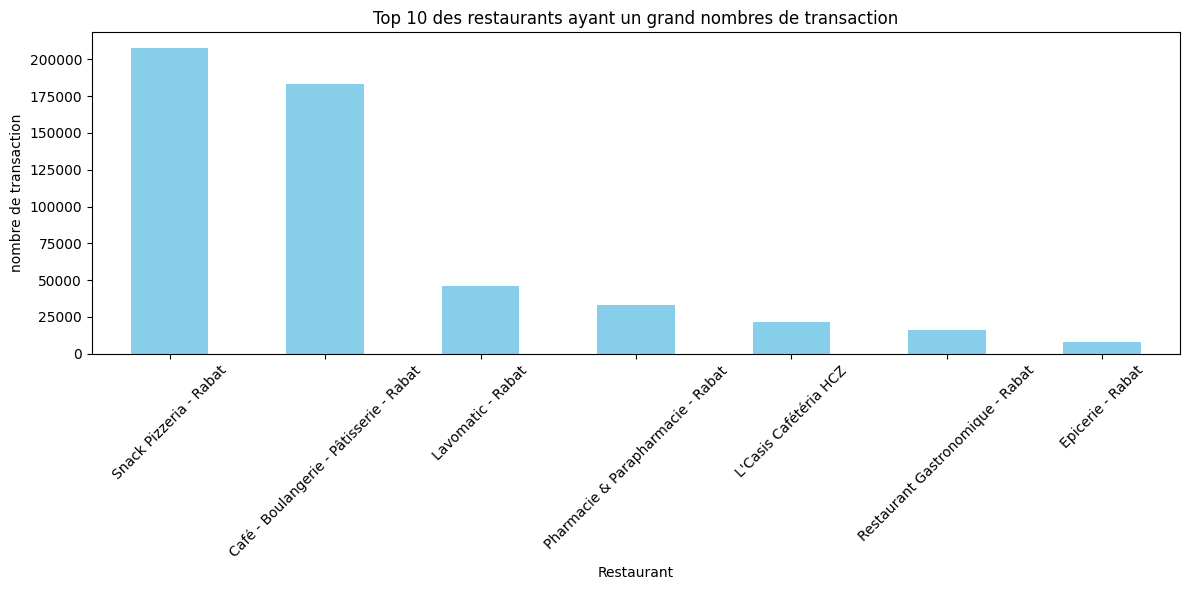

In [170]:
restaurant_transaction = df.groupby('restaurant')['montant_rgl'].size().sort_values(ascending=False)

# Affichage des 10 restaurants ayant un grand nombres de transaction


plt.figure(figsize=(12,6 ))
restaurant_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 des restaurants ayant un grand nombres de transaction')
plt.xlabel('Restaurant')
plt.ylabel('nombre de transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [171]:
df['heure_reglement'] = pd.to_datetime(df['heure_reglement'], format='%H:%M:%S').dt.hour

<Figure size 800x400 with 0 Axes>

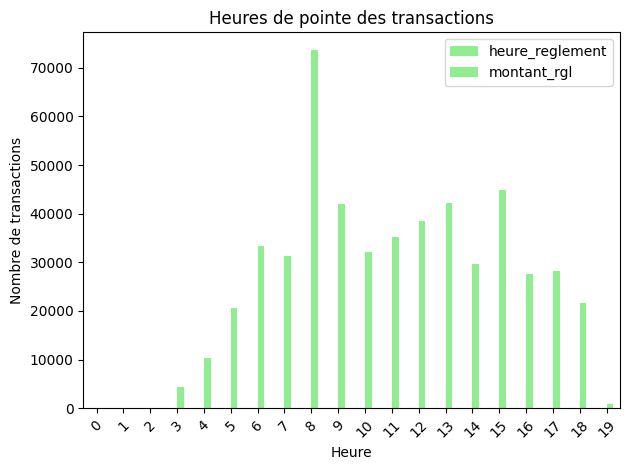

In [172]:
hourly_transactions = df.groupby('heure_reglement')['montant_rgl'].sum().reset_index()
#les heures de pointe des transactions
plt.figure(figsize=(8, 4))
hourly_transactions.plot(kind='bar', color='lightgreen')
plt.title('Heures de pointe des transactions')
plt.xlabel('Heure')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Détection des anomalies***

In [173]:
Q1 = df['montant_rgl'].quantile(0.25)
Q3 = df['montant_rgl'].quantile(0.75)
IQR = Q3 - Q1

# Definir les seuils superieurs et inferieurs pour identifier les anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1)
print(Q3)
print(lower_bound)
print(upper_bound)

anomalies = df[(df['montant_rgl'] < lower_bound) | (df['montant_rgl'] > upper_bound)]

10.0
45.0
-42.5
97.5


In [174]:
#grouper les anomalies par client et restaurent
anomalies_grouped_client = anomalies.groupby('beneficiaire_cpp')['montant_rgl'].size().reset_index(name='count')
anomalies_grouped_restaurant = anomalies.groupby( 'restaurant')['montant_rgl'].size().reset_index(name='count')
anomalies_grouped_heure_reglement = anomalies.groupby('heure_reglement')['montant_rgl'].size().reset_index(name='count')


top_10_clients = anomalies_grouped_client.reset_index().sort_values(by='count', ascending=False).head(10)



In [175]:
print(anomalies.shape[0])

564


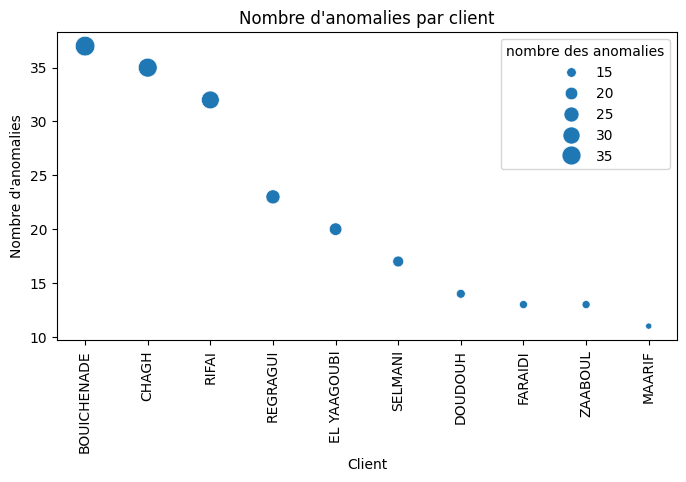

In [176]:
# Bar plot pour les anomalies par client
plt.figure(figsize=(8,4))
sns.scatterplot(x='beneficiaire_cpp', y='count', size='count', sizes=(20, 200), data=top_10_clients)
plt.title('Nombre d\'anomalies par client')
plt.xticks(rotation=90)
plt.xlabel('Client')
plt.ylabel('Nombre d\'anomalies')
plt.legend(title='nombre des anomalies')
plt.show()

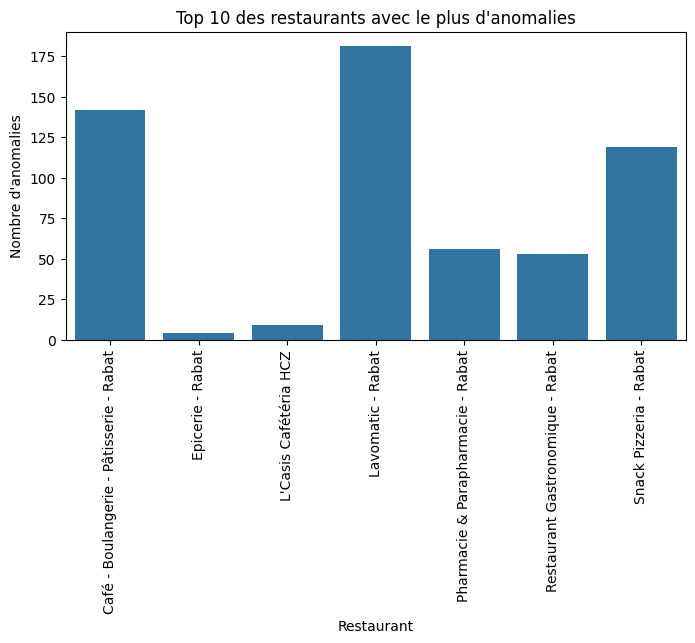

In [177]:
# Bar plot pour les anomalies par restaurant
plt.figure(figsize=(8,4))
sns.barplot(x='restaurant', y='count', data=anomalies_grouped_restaurant)
plt.title('Top 10 des restaurants avec le plus d\'anomalies')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Nombre d\'anomalies')
plt.show()


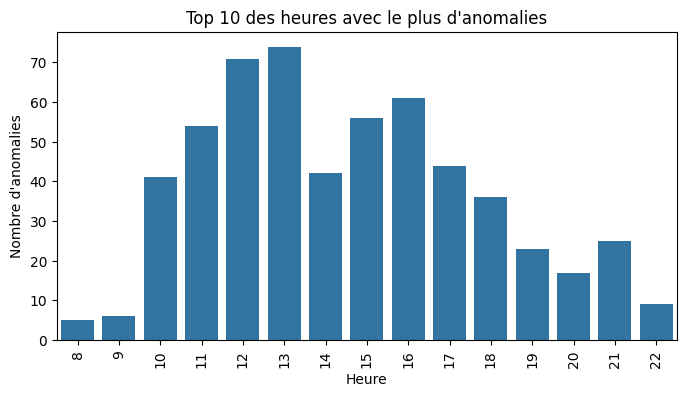

In [178]:
# Bar plot pour les anomalies par heure de la journée
plt.figure(figsize=(8,4))
sns.barplot(x='heure_reglement', y='count', data=anomalies_grouped_heure_reglement)
plt.title('Top 10 des heures avec le plus d\'anomalies')
plt.xticks(rotation=90)
plt.xlabel('Heure')
plt.ylabel('Nombre d\'anomalies')
plt.show()


# ***Analyse des Anomalies de Montants de Transactions : Une Approche de Régression Logistique***

In [180]:
df.head(1)

,id_reglement,id_operation,date_reglement,heure_reglement,paiement,montant_rgl,montant_verse,montant_rst,id_client,client,...,id_user,prenom user,role,statut,pointage,date_sys,mois_reglment,semaine_reglement,year_reglment,Anomaly
0,287967,700877295,2024-02-29,8,Carte prépayée,13.5,13.5,0.0,CLT10001,CLIENT AU COMPTANT,...,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29,2,9,2024,1


Accuracy: 0.999671592775041


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


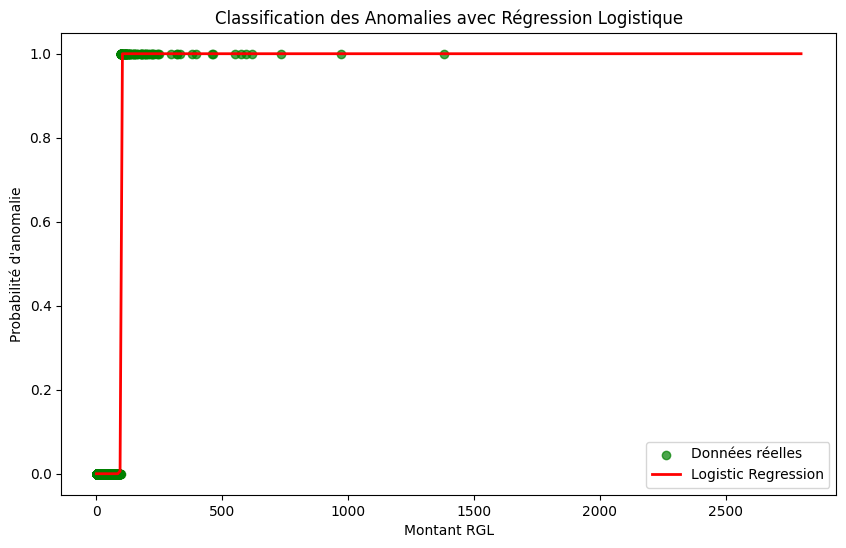

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

df['is_anomaly'] = 0
df.loc[(df['montant_rgl'] < lower_bound) | (df['montant_rgl'] > upper_bound), 'is_anomaly'] = 1

X = df[['montant_rgl']]
y = df['is_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualisation
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='green', label='Données réelles', alpha=0.7)

X_range = np.linspace(X['montant_rgl'].min(), X['montant_rgl'].max(), 300).reshape(-1, 1)
y_proba = model.predict_proba(X_range)[:, 1]
plt.plot(X_range, y_proba, color='red', label='Logistic Regression', linewidth=2)


plt.title('Classification des Anomalies avec Régression Logistique')
plt.xlabel('Montant RGL')
plt.ylabel('Probabilité d\'anomalie')
plt.legend()

plt.show()


# ***Analyse des performances des caissiers***

In [182]:
grouped_caissier = df.groupby('prenom user')['montant_rgl'].agg(['sum','count']).reset_index()
grouped_caissier = grouped_caissier.sort_values(by='sum',ascending=False)

<ipython-input-183-d1ad79cf82ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prenom user', y='sum', data=grouped_caissier, palette='viridis')


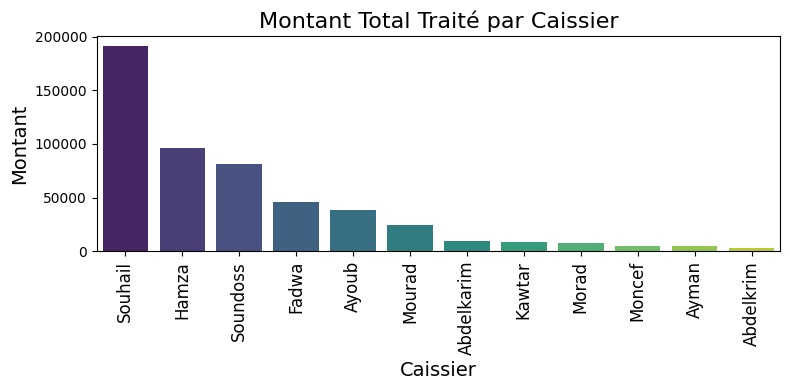

In [183]:
#bar plot pour le Montant Total Traité par Caissier
plt.figure(figsize=(8,4))
sns.barplot(x='prenom user', y='sum', data=grouped_caissier, palette='viridis')


plt.title('Montant Total Traité par Caissier', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Caissier', fontsize=14)
plt.ylabel('Montant', fontsize=14)

plt.tight_layout()


plt.show()

<ipython-input-184-e6d158996d1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prenom user', y='count', data=grouped_caissier, palette='viridis')


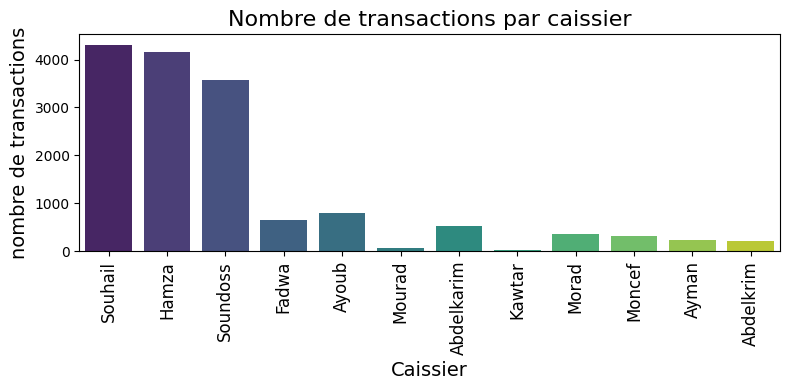

In [184]:
#bar plot pour le Nombre de transactions par caissier
plt.figure(figsize=(8,4))
sns.barplot(x='prenom user', y='count', data=grouped_caissier, palette='viridis')
plt.title('Nombre de transactions par caissier',fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Caissier', fontsize=14)
plt.ylabel('nombre de transactions', fontsize=14)
plt.tight_layout()


plt.show()

# **Analyse de la corrélation**

Correlation entre le solde des cartes prepayees et les depenses des clients :
             solde_cpp  montant_rgl
solde_cpp     1.000000     0.178339
montant_rgl   0.178339     1.000000


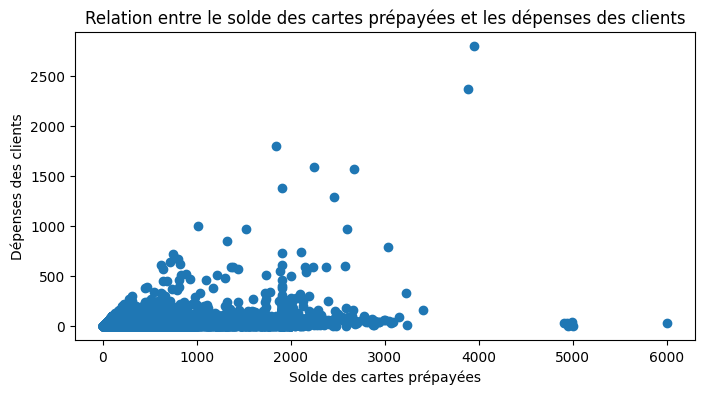

        beneficiaire_cpp  solde_cpp  montant_rgl
0                  AABID     729.00   259.500000
1                  AABIL   71232.92  2824.900002
2                  AARAB  155300.56  7205.000000
3              AARIBECHE     130.50    28.000000
4                  AAYLA     914.09   184.625000
..                   ...        ...          ...
850            meryem el     369.50   108.000000
851               nassri     183.76    33.740000
852  nouhaila alaoui ait     159.00    36.000000
853               rhazal     295.02    30.000000
854                sylla     167.00    97.000000

[855 rows x 3 columns]


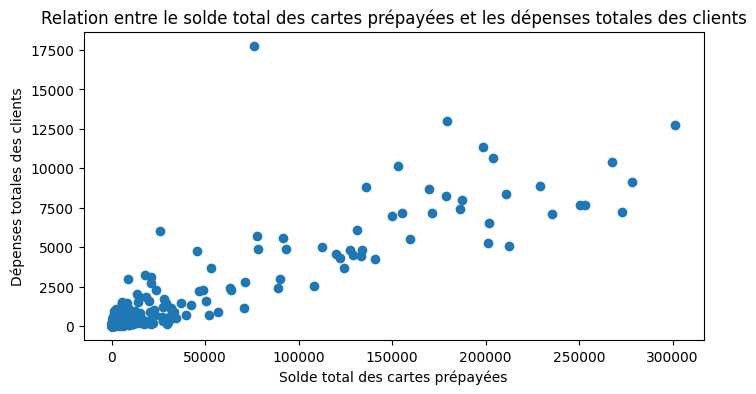

In [185]:

# Analyse de la relation entre le solde des cartes prepayees et les depenses des clients
correlation = df[['solde_cpp', 'montant_rgl']].corr()
print("Correlation entre le solde des cartes prepayees et les depenses des clients :")
print(correlation)

# Visualiser la relation avec un nuage de points
plt.figure(figsize=(8, 4))
plt.scatter(df['solde_cpp'], df['montant_rgl'])
plt.xlabel('Solde des cartes prépayées')
plt.ylabel('Dépenses des clients')
plt.title('Relation entre le solde des cartes prépayées et les dépenses des clients')
plt.show()

# Analyse de la relation en fonction du client
client_spending_balance = df.groupby('beneficiaire_cpp').agg({'solde_cpp': 'sum', 'montant_rgl': 'sum'}).reset_index()
print(client_spending_balance)
plt.figure(figsize=(8,4))
plt.scatter(client_spending_balance['solde_cpp'], client_spending_balance['montant_rgl'])
plt.xlabel('Solde total des cartes prépayées')
plt.ylabel('Dépenses totales des clients')
plt.title('Relation entre le solde total des cartes prépayées et les dépenses totales des clients')
plt.show()




# ***Prediction des Depenses des Clients en Fonction de leur Solde de Carte Prepayee***

R² Score: 0.7929949517163379


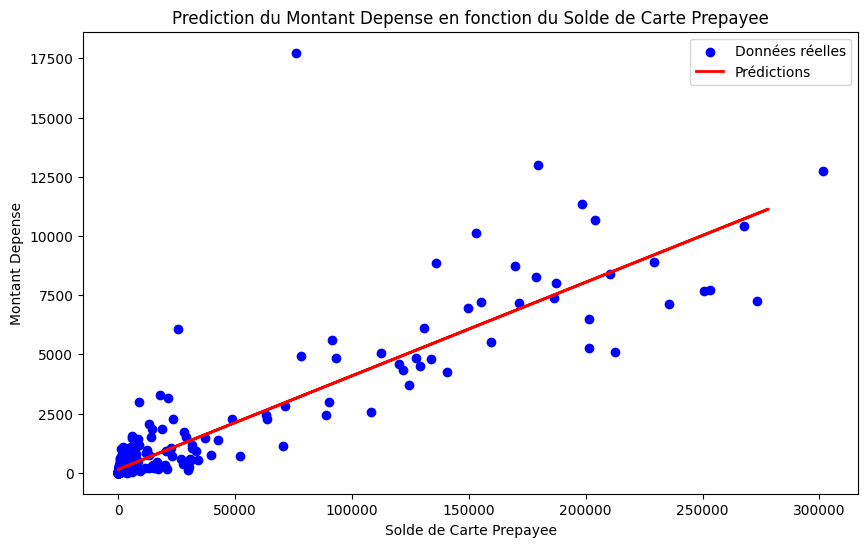

In [186]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




X = client_spending_balance[['solde_cpp']]
y = client_spending_balance['montant_rgl']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")

# Visualisation des reeultats
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions')
plt.title("Prediction du Montant Depense en fonction du Solde de Carte Prepayee")
plt.xlabel("Solde de Carte Prepayee")
plt.ylabel("Montant Depense")
plt.legend()
plt.show()
